In [1]:
# 통계분석
# t-test : 검정통계량이 귀무가설 하에 t-분포를 따르는 통계적 가설 검정 방법

# 예제) cat 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지 통계적 검정을 수행하고 결과를 해석해보자.(양측검정, 유의수준=0.05)

import pandas as pd
cats = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv")
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [2]:
# Bwt는 고양이의 몸무게이고 Hwt는 고양이의 길이
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [8]:
cats['Bwt'].mean()

2.7236111111111114

In [3]:
import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6  # 고양이 몸무게
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)

In [4]:
# p-value가 유의수준보다 작으므로 "데이터가 정규분포를 따른다"는 귀무가설을 기각한다. 즉, cat의 Bwt는 정규분포를 따르지 않는다.
# 정규분포를 따르지 않으므로 wilcoxon test로 t-test를 진행한다.

stats.wilcoxon(cats.Bwt - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

Text(0, 0.5, 'Count')

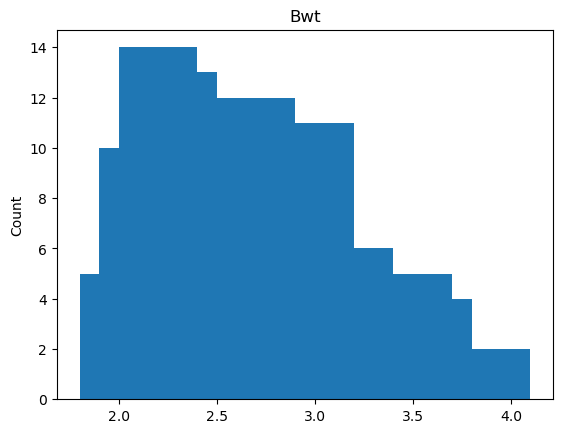

In [7]:
# 데이터 시각화
import matplotlib.pyplot as plt
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)
width=0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values, width)
plt.title('Bwt')
plt.ylabel('Count')

# 그래프가 정규성을 띄지않음을 확인할 수 있으며 
# wilcoxon test결과 p-value가 유의수준 0.05보다 작으므로 고양이의 몸무게가 2.6kg이라는 귀무가설을 기각
# 즉, 유의수준 0.05하에 고양이의 평균몸무게가 2.6kg이라고 할 수 없음

In [1]:
# 대응표본 T-검정(Paired Sample t-test) : 단일모집단에 대해 어떤 처리를 가했을 때, 처리 전후에 따른 평균의 차이를 비교할 때 사용

# 귀무가설(H0) : 두 모평균 사이의 차이는 없다.
# 대립가설(H1) : 두 모평균 사이의 차이는 있다.

# 예시) 10명의 환자 대상 수면영양제 복영 전후의 수면시간을 측정하여 영양제의 효과가 있는지를 판단해보자.
# 표본이 정규성을 만족한다는 가정, 만족하지 않으면 wilcoxon-test진행, 유의수준 = 0.05

import pandas as pd
cats = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv")
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [3]:
# 귀무가설(H0) : 수컷과 암컷 고양이의 몸무게 차이는 없다.
# 대립가설(H1) : 수컷과 암컷 고양이의 몸무게 차이는 있다.

# 암컷(F)과 수컷(M) 고양이의 체중(Bwt)에 대해 등분산성(분산이 같은지)을 검정하는 Levene 검정을 수행하는 코드
'''
Levene 등분산 검정
stats.levene(female, male)

🔍 Levene Test (등분산 검정)

귀무가설 H₀: 두 집단의 분산은 같다 (= 등분산)
대립가설 H₁: 두 집단의 분산은 다르다 (이분산)

결과 해석 (예시)
LeveneResult(statistic=0.xxx, pvalue=0.xxx) 이런 형태로 출력됨.
p-value > 0.05 → 등분산 가정 가능
p-value ≤ 0.05 → 분산이 다름 → 등분산 가정 불가

❗ 참고: 왜 등분산 검정을 하는가?
두 집단 평균을 비교하는 t-test를 하기 전에
등분산 t-test인지, Welch t-test(이분산 t-test)인지 선택하기 위해.

'''
import scipy.stats as stats
from scipy.stats import shapiro
female = cats.loc[cats.Sex == 'F', 'Bwt']
male = cats.loc[cats.Sex == 'M', 'Bwt']
stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [4]:
# 성별에 따른 몸무게가 등분산성을 만족하지 않으므로 equal_var = False로 독립 t-test 시행
stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [5]:
# 검정결과 p-value는 유의수준 0.05보다 작으므로 귀무가설(수컷과 암컷 고양이의 몸무게 차이는 없다)을 기각
print(female.mean(), male.mean())

2.359574468085107 2.8999999999999995


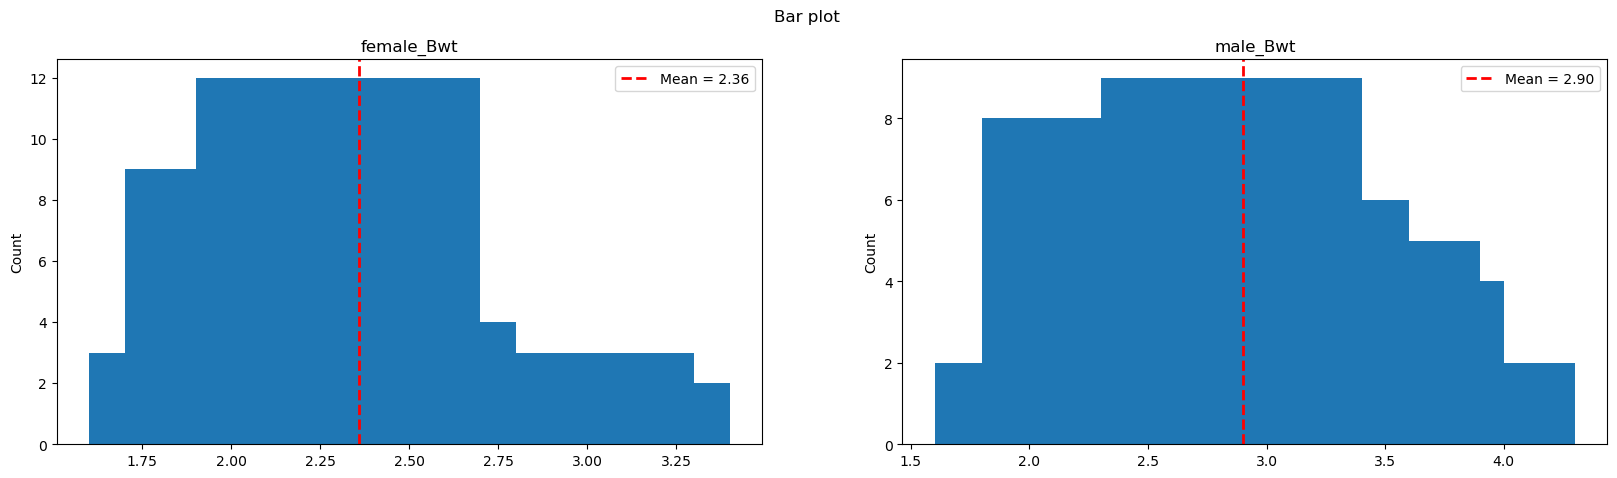

In [8]:
# 시각화
import matplotlib.pyplot as plt

female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Bar plot')
width = 0.4

# female
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')

# female 평균선 추가
female_mean = female.mean()
axs[0].axvline(female_mean, color='red', linestyle='--', linewidth=2,
               label=f'Mean = {female_mean:.2f}')
axs[0].legend()

# male
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')

# male 평균선 추가
male_mean = male.mean()
axs[1].axvline(male_mean, color='red', linestyle='--', linewidth=2,
               label=f'Mean = {male_mean:.2f}')
axs[1].legend()

plt.show()



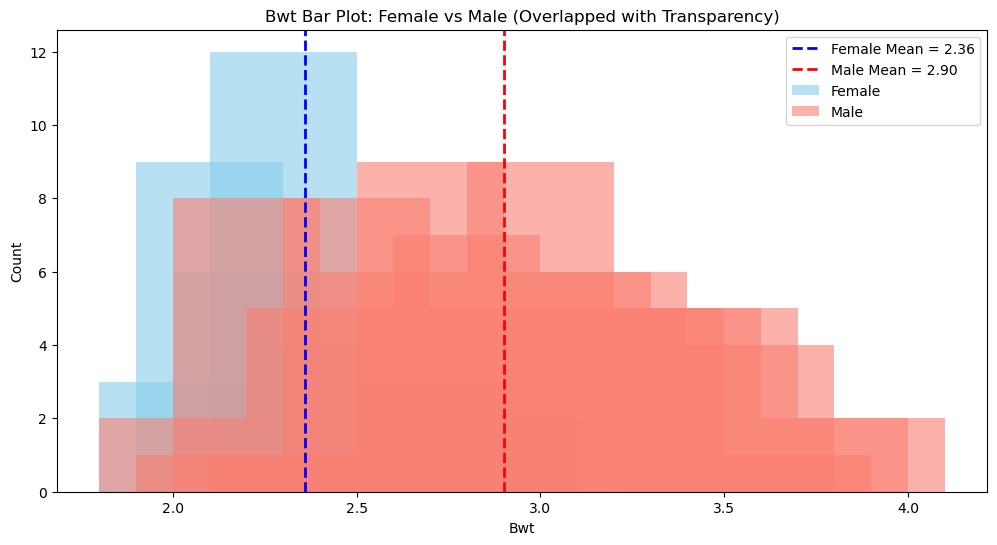

In [10]:
# 두 그래프를 색만 다르게 하여 하나의 화면에 표시 + 평균선 표시
import matplotlib.pyplot as plt

female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)

plt.figure(figsize=(12, 6))
plt.title("Bwt Bar Plot: Female vs Male (Overlapped with Transparency)")

# x축 값 전체(중복 제거)
x_values = sorted(set(female_Bwt_cnt.index) | set(male_Bwt_cnt.index))

# female bar
plt.bar(
    female_Bwt_cnt.index, female_Bwt_cnt.values,
    color='skyblue', alpha=0.6, width=0.4, label='Female'
)

# male bar (같은 위치에 투명하게)
plt.bar(
    male_Bwt_cnt.index, male_Bwt_cnt.values,
    color='salmon', alpha=0.6, width=0.4, label='Male'
)

# 🔵 female 평균선
female_mean = female.mean()
plt.axvline(female_mean, color='blue', linestyle='--', linewidth=2,
            label=f'Female Mean = {female_mean:.2f}')

# 🔴 male 평균선
male_mean = male.mean()
plt.axvline(male_mean, color='red', linestyle='--', linewidth=2,
            label=f'Male Mean = {male_mean:.2f}')

plt.xlabel("Bwt")
plt.ylabel("Count")
plt.legend()
plt.show()


In [11]:
#########################################################################
# 분산분석(ANOVA : ANalysis Of VAriance) : 세 집단 이상의 평균이 서로 같은지 판단하는 확인 검정

import scipy.stats as stats
import pandas as pd
Iris_data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv")
Iris_data.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [12]:
# 4개의 수치형 변수와 1개의 명목형 변수가 있음을 확인
# target이 변수가 몇 개인가? 확인
Iris_data['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
# target은 3개의 변수가 있음
# 몇개씩 있는가 확인
Iris_data.target.value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [14]:
# target별로 변수에 할당하여 분산분석 진행
target_list = Iris_data['target'].unique()
setosa = Iris_data[Iris_data['target'] == target_list[0]]['sepal width']
versicolor = Iris_data[Iris_data['target'] == target_list[1]]['sepal width']
virginica = Iris_data[Iris_data['target'] == target_list[2]]['sepal width']
print(target_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


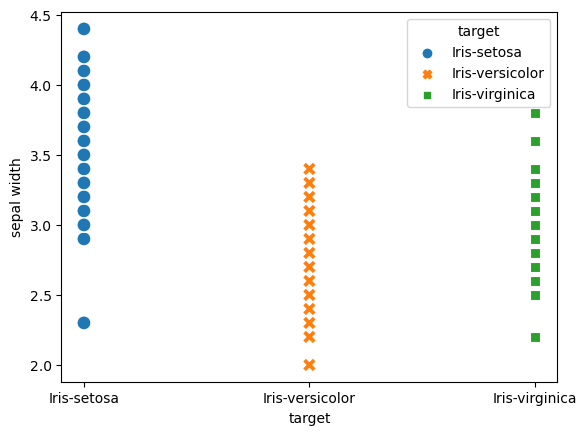

In [16]:
# target을 시각화하여 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='target',
               y='sepal width',
               hue='target',
               style='target',
               s=100,
               data=Iris_data)
plt.show()

In [18]:
# 대략 3종류의 평균은 차이가 있어 보인다. 통계적으로 차이가 있는지 검정해보자.
# 귀무가설(H0) : 세가지 종의 sepal width 평균은 같다.
# 대립가설(H1) : 세가지 종의 sepal width 평균은 차이가 있다.

# 우선 각 변수가 정규성을 띄고 있는지 확인
print(stats.shapiro(setosa), stats.shapiro(versicolor), stats.shapiro(virginica))

ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838) ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093) ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


In [19]:
# 3개 모두 p-value > 0.05 ㅁ로 정규성을 만족한다. 따라서 등분산 검정을 시행한다.
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [20]:
# p-value가 유의수준 0.05보다 크므로 귀무가설을 채책하여 세 집단 간 분산이 같다고 할 수 있으므로 AVOVA검정 시행
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

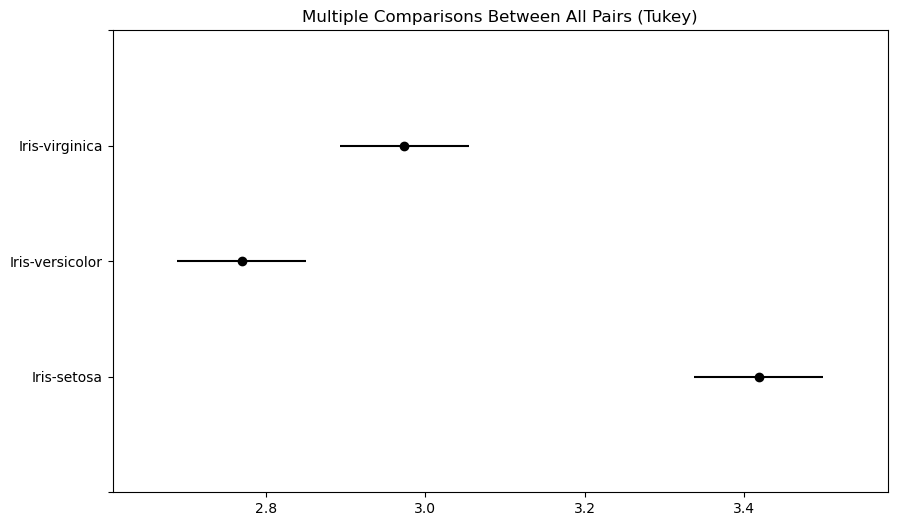

In [23]:
# 검정결과 pvalue가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, 세가지 종의 꽃받침 폭의 평균은 차이가 있다.
# 세가지 종들 중 어떤 종들 간에 꽃받침의 폭에 차이가 있는지 파악하기 위해 사후 검정 수행

'''
🔍 Tukey HSD(정직한 유의차 검정)란?

ANOVA에서는
“세 그룹 평균 중 어디가 다른지는 알려주지 않는다”
→ 단지 전체 평균이 모두 같다고 할 수 없는지만 판단.

그래서 사후검정(Post-hoc test)이 필요함.

Tukey HSD는 세 그룹을 모두 서로 비교해서
“어느 두 그룹 간 차이가 유의미한지” 알려주는 방법.
'''
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data = Iris_data['sepal width'], groups=Iris_data['target'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()
'''
Tukey 사후검정의 대표적 그래프입니다.

🔍 이 그래프에서 보는 것

x축: 평균 차이 (두 그룹 간 mean difference)

가로선(수평선): 각 그룹 쌍의 신뢰구간

신뢰구간이 0을 지나면 → 차이가 없다(유의 X)

0을 지나지 않고 한쪽으로만 가면 → 그 두 그룹은 평균 차이가 유의미함

즉
➡️ “어떤 두 품종 사이에서 sepal width 차이가 나는지”
한 번에 시각적으로 볼 수 있는 그래프.
'''

In [22]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.7246,-0.5714,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.5206,-0.3674,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.1274,0.2806,True


In [24]:
# 만약 정규성을 만족하지 못했을 경우에는 아래와 같아ㅣ kruskal 검정을 진행
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [28]:
import pingouin as pg
pg.__version__   # 제대로 설치 되었는지 확인

'0.5.5'

In [29]:
# 만약 등분산성을 만족하지 못했을 때는 welch_anova 분석 시행

pg.welch_anova(data=Iris_data, dv='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [30]:
#####################################################################
# 이원배치 분산분석

import pandas as pd
mtcars = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/mtcars.csv")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [31]:
mtcars = mtcars[['mpg','am','cyl']]

In [32]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [33]:
'''
1. 교호작용 검정
 귀무가설 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다.
 대립가설 :                ...                               있다.

2. 주효과 검정1
 귀무가설 : 실린더 개수에 따른 주행거리의 차이는 존재하지 않는다.
 대립가설 :                ...                       한다.
 
3. 주효과 검정2
 귀무가설 : 변속기 종류에 따른 주행거리의 차이는 존재하지 않는다.
 대립가설 :                ...                       한다.
'''
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table =  anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


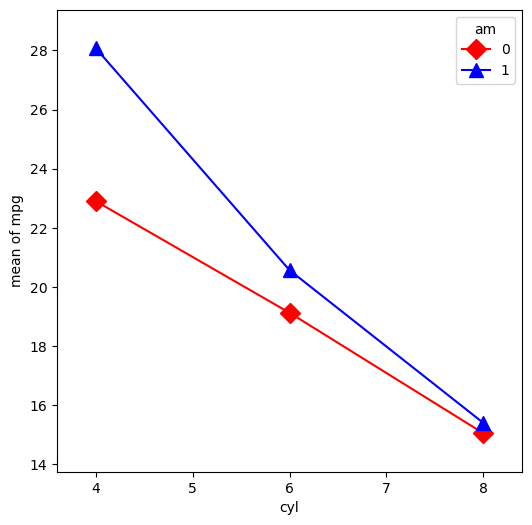

In [40]:
'''
해석 :

1. cyl과 am간의 p-value는 0.2688으로 0.05보다 크므로 귀무가설을 기각하지 않는다.
  즉, 변속기 종류와 실린더 개수간에는 상호작용 효과가 없다.
  
2. cyl 변수에 대한 p-value는 0.05보다 매우 작으므로 귀무가설을 기각한다.
  즉, 실린더 개수에 따른 주행거리의 차이는 존재한다.
  
3. am 변수에 대한 p-value는 0.05보다 크므로 귀무가설을 기각하지 않는다.
  즉, 변속기 종류에 따른 주행거리의 차이는 존재한다.

'''

# 교호작용의 효과를 그래프로 확인
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
# 독립변수 cyl, am과 종속변수 mpg을 Series로 변경
cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl, am, mpg,
                      colors= ['red', 'blue'], markers=['D','^'], ms=10, ax=ax)

In [41]:
#################################################################################
# 교차분석(카이제곱 검정) : 설명변수가 범주형 변수인 경우 통계 기법

# 타이타닉 사례
# 귀무가설 : 타이타닉호의 생존자중 남자의 비율이 50%, 여자의 비율이 50%이다.
# 대립가설 :                        ...                                 라고 할 수 없다.

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [42]:
# sex 변수는 결측치가 없고 명목형 변수임을 확인
df_t = df[df['survived'] == 1]  # 생존한 사람들만 추출
table = df_t[['sex']].value_counts()
table

sex   
female    233
male      109
Name: count, dtype: int64

In [43]:
# 유의수준 0.05로 적합도 검정 수행
from scipy.stats import chisquare
chi = chisquare(table, f_exp=[171, 171])
print('<적합도 검정>\n', chi)

<적합도 검정>
 Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


In [44]:
# 결과 해석 : pvalue가 0.05보다 월씬 작으므로 귀무가설을 기각한다. 즉, 생존자중 남자와 여자의 비율이 50:50이라고 할 수 없다.

# 독립성 검정 : 모집단이 두 개의 변수 A, B에 의해 범주화 되었을 때, 두 변수들 사이의 관계가 독립인지 여부를 검정하는 방법
df = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/titanic.csv")
table = pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [45]:
# 카이제곱 검정을 통한 독립성 검정 수행
from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(table)
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
df: 2
expect: 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [46]:
# 해석 : p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉, 좌석등급과 생존은 독립이 아니다.

#################################################################################################
# 단순 선형 회귀 분석
import pandas as pd
import numpy as np
house = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/kc_house_data.csv")
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,standard,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,standard,0,3,8,2310,0,2014,0,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,standard,0,3,7,1020,0,2009,0,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,standard,0,3,8,1600,0,2004,0,1410,1287


In [48]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [49]:
house = house[['price', 'sqft_living']]
house

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


In [50]:
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


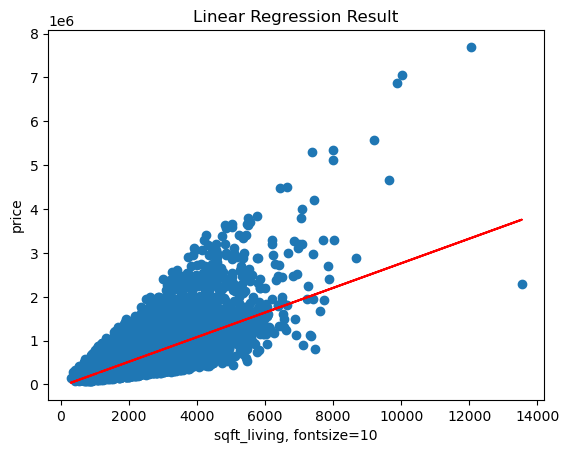

In [51]:
# 독립변수와 종속변수의 상관관계가 약 0.7로 양의 상관관계가 있음을 확인

# 회귀계수와 상관계수가 어떤 차이가 있는지 알아보자.
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
y = house['price']
X = house['sqft_living']

lr = ols('price ~ sqft_living', data=house).fit()
y_pred = lr.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('sqft_living, fontsize=10')
plt.ylabel('price', fontsize=10)
plt.title('Linear Regression Result')
plt.show()

In [52]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:15:47   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# 선형 회귀분석에서 다중공선성을 제거하고 최적의 모델을 찾기 위해 변수 선택법을 진행
import pandas as pd
Cars = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Cars93.csv")
Cars

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,Front,...,7,187,115,72,38,34.0,-2147483648,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,Front,...,5,180,103,67,35,31.5,14,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,Front,...,4,159,97,66,36,26.0,15,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14,2985,non-USA,Volvo 240


In [56]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [58]:
# 독립변수 : EnginSize, RPM, Weight, Length, MPG.city, MPG.highway   종속변수 : Price 로 하자.
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
Cars.columns = Cars.columns.str.replace(".", "")
model = smf.ols(formula = "Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data = Cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           4.88e-14
Time:                        17:10:24   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# 다중공선성 제거와 변수선택법으로 모델의 성능을 높이자.
Cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [61]:
# VIF값 구하기
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices("Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data=Cars, return_type="dataframe")
vif_list=[]
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [62]:
# VIF값을 통해 MPGcity값을 제거해야 함을 알 수 있다. 이를 제거하고 다시 다중 선형 회귀분석을 진행하자.
model = smf.ols(formula = "Price ~ EngineSize + RPM + Weight + MPGhighway", data=Cars)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           2.26e-15
Time:                        17:16:02   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model

# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])

In [64]:
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000161D0B453D0>
forward
Processed  1 models on 0 predictors in 0.001995563507080078
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000161CF9EFD30>
Processed  5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000161D0B45040>
forward
Processed  2 models on 1 predictors in 0.002991199493408203
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000161D0B459A0>
Processed  4 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000161CF9EFD30>
forward
Processe

In [65]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           6.75e-16
Time:                        17:20:13   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
######################################################################################
# 군집분석

import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

US = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/USArrests.csv')

US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labelList=US.State.tolist()
US.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


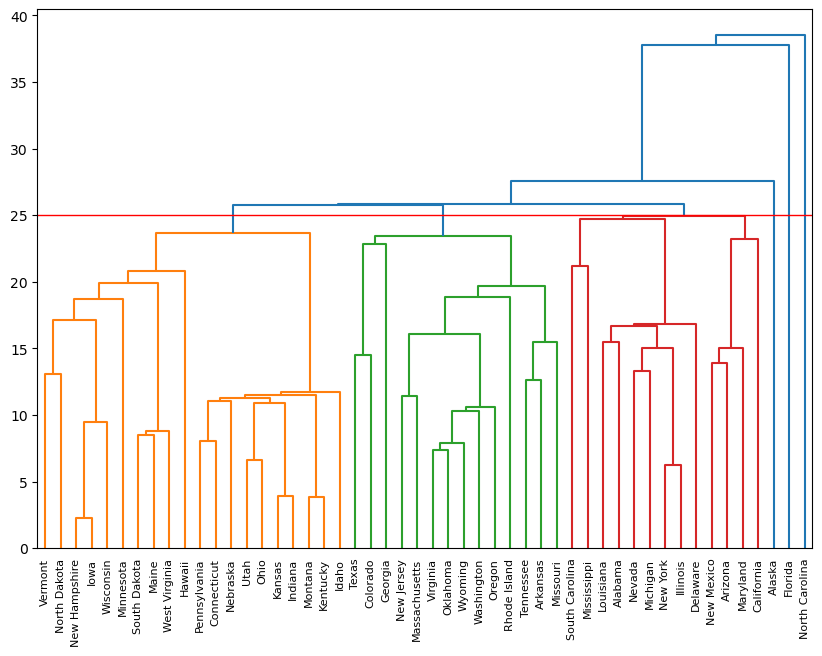

In [68]:
# 최단연결법
single = linkage(US.iloc[:, 1::], metric ='euclidean', method='single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=25,   #군집의 수를 설정하는 Height 값 설정
            show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

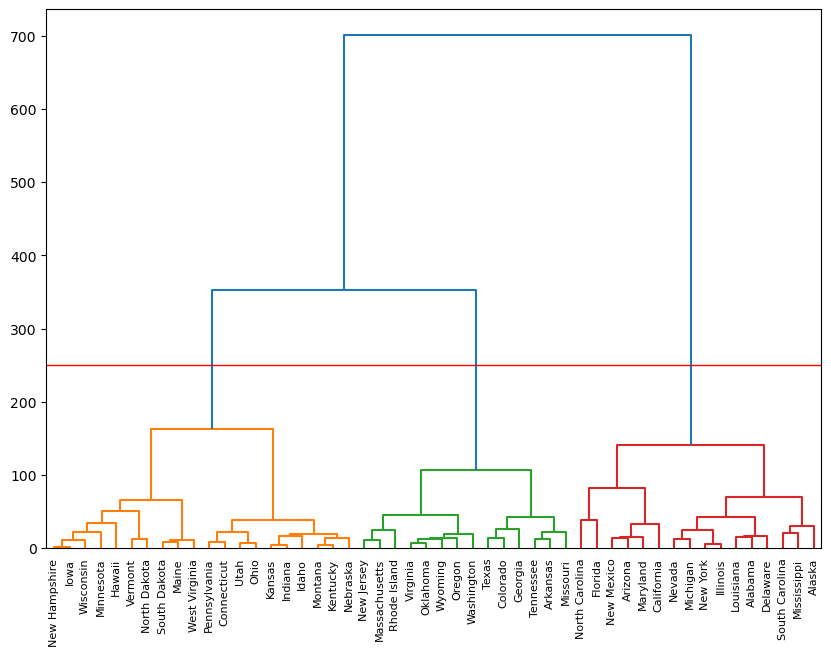

In [69]:
# 와드연결법
ward = linkage(US.iloc[:, 1::], metric ='euclidean', method='ward')
# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=250,
            show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

In [76]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [77]:
US['cluster'] = assignments
US

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [78]:
US.groupby('cluster').mean(numeric_only=True)


,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [2]:
#############################################################
# k-means 알고리즘
# 필요한 모듈
import pandas as pd 
from sklearn.cluster import KMeans
# 데이터 로드
iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
X = iris.drop('target',axis=1)
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# 클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(X, labels))

C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


513.3038433517568


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


560.3999242466402


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


529.1207190840455


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


494.0943819140987


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


471.65021087892444


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


448.33207182773526


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


436.92028527534933


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


407.12343463976123


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have

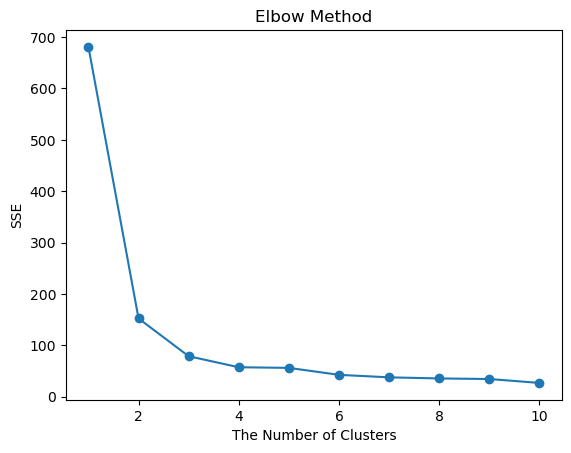

[680.8244000000001, 152.36870647733906, 78.94506582597731, 57.47327326549492, 56.25452709030101, 42.69519156327544, 37.82143557312253, 35.6628720893142, 34.5658657009657, 26.961246699355396]


In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # MKL 메모리 leak 경고 방지용 (옵션)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i,
            random_state=1,
            n_init="auto"   # 또는 n_init=10 로 고정해도 됩니다
        )
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method')
    plt.show()
    
    print(sse)

elbow(X)


In [12]:
# 해석 : 위에서 엘보우 메서드로 2에서 3으로 k가 갈때 기울기 소실이 발생 -> 해당데이터는 2~3개의 군집이 적절

import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd

# iris 원본 불러오기
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['species'] = [data.target_names[i] for i in data.target]

# X = 군집화에 쓸 숫자 데이터만
X = iris[data.feature_names]

# KMeans
km = KMeans(n_clusters=3, random_state=1, n_init='auto')
km.fit(X)

iris['cluster'] = km.labels_

# ⬇ 여기서 에러 안 나게 숫자열만 평균
num_cols = iris.select_dtypes(include='number').columns
iris.groupby('cluster')[num_cols].mean()


C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
cluster,,,,,
0,5.883607,2.740984,4.388525,1.434426,0.0
1,5.006000,3.428000,1.462000,0.246000,1.0
2,6.853846,3.076923,5.715385,2.053846,2.0


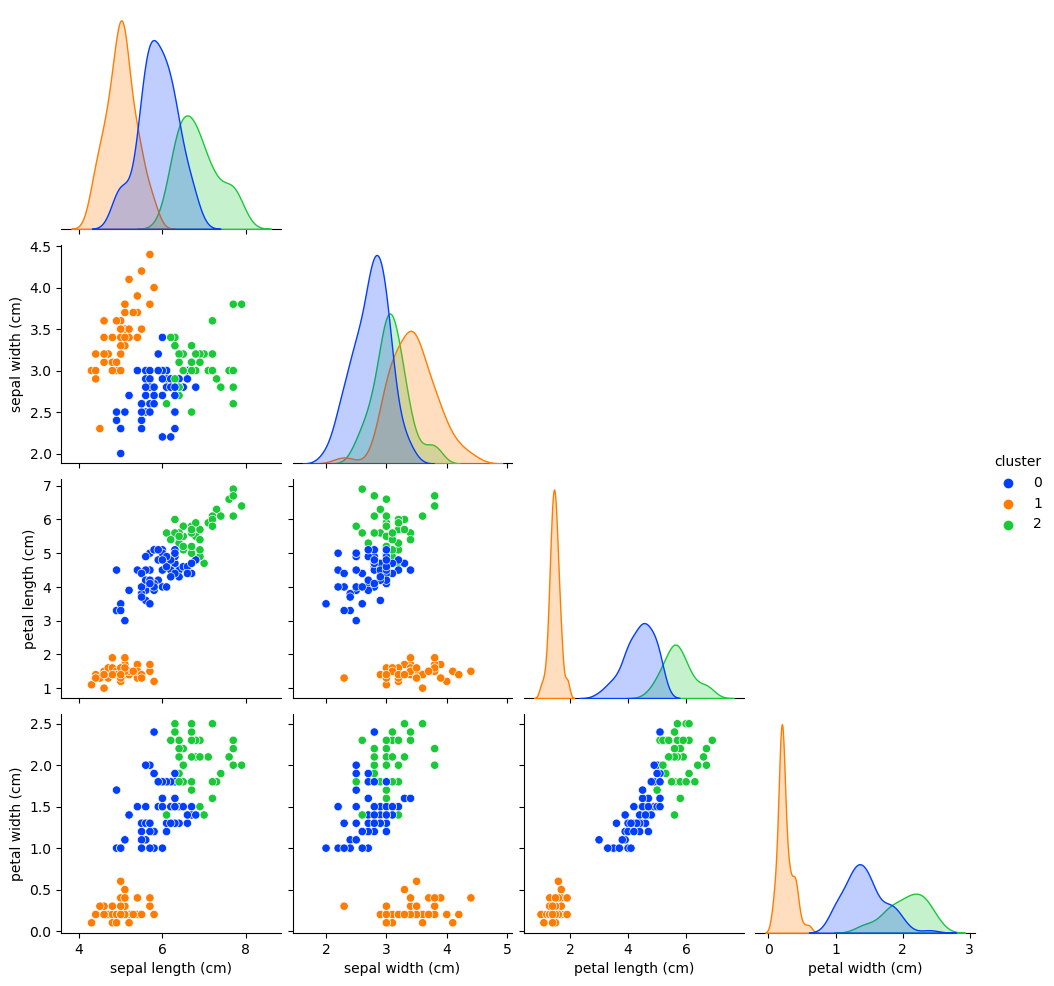

In [14]:
# AVOVA 분석
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    iris,                         # 전체 데이터프레임
    diag_kind='kde',
    hue='cluster',                # 클러스터 색상 구분
    corner=True,
    palette='bright'
)

plt.show()



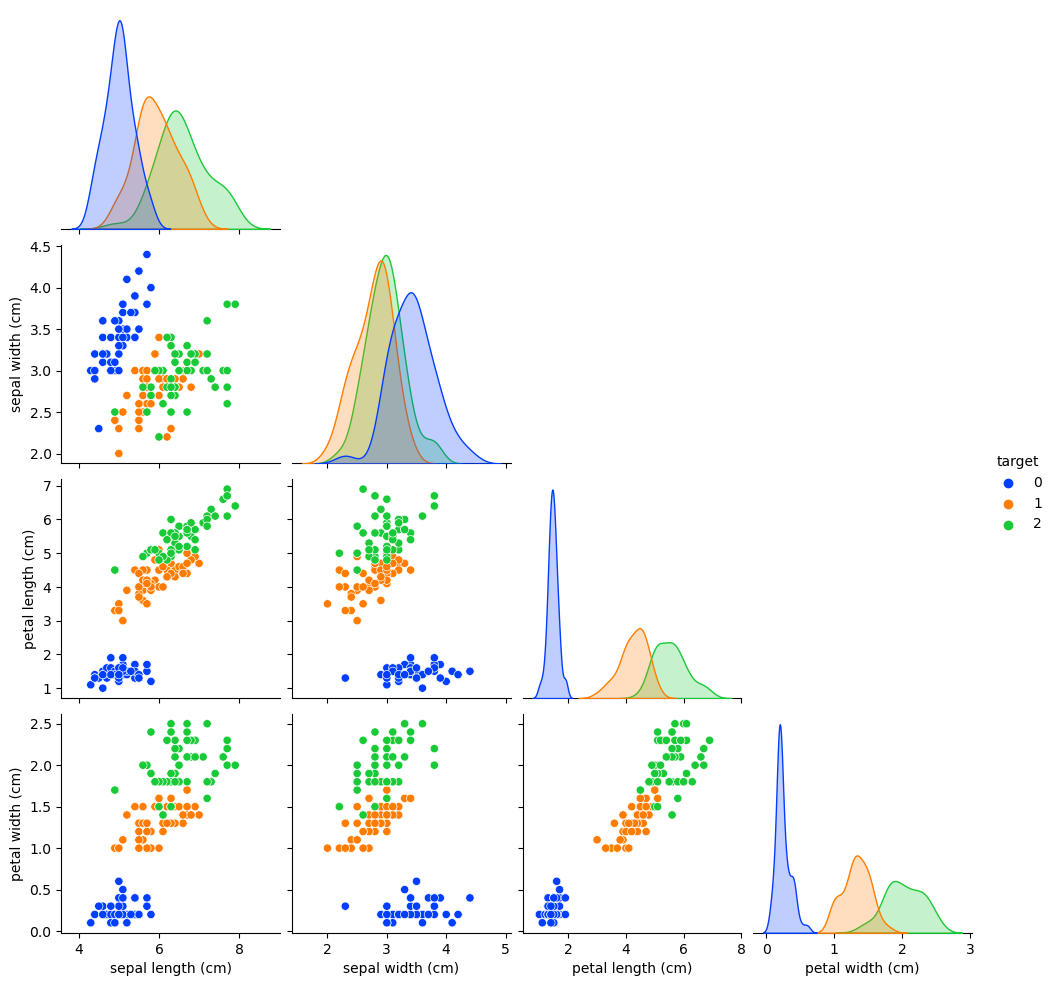

In [16]:
# 원본 데이터 iris target 시각화
import seaborn as sns
import matplotlib.pyplot as plt
iris['target'] = data.target 
sns.pairplot(iris.drop(columns=['cluster']),
            diag_kind='kde',
            hue='target',
            corner=True,
            palette='bright')
plt.show()

In [18]:
# 혼합분포 군집분석
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

iris = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv")
df = iris.drop('target', axis=1)
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 가우시안 혼합모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

C:\Users\kakaopaysec\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
# cluster변수에 할당하고 통계량을 확인해보자.
df['gmm_cluster'] = gmm_labels
clusters = [0, 1, 2]
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.006000,3.418000,1.464000,0.244000
1,6.554545,2.950909,5.489091,1.989091
2,5.904444,2.775556,4.193333,1.293333


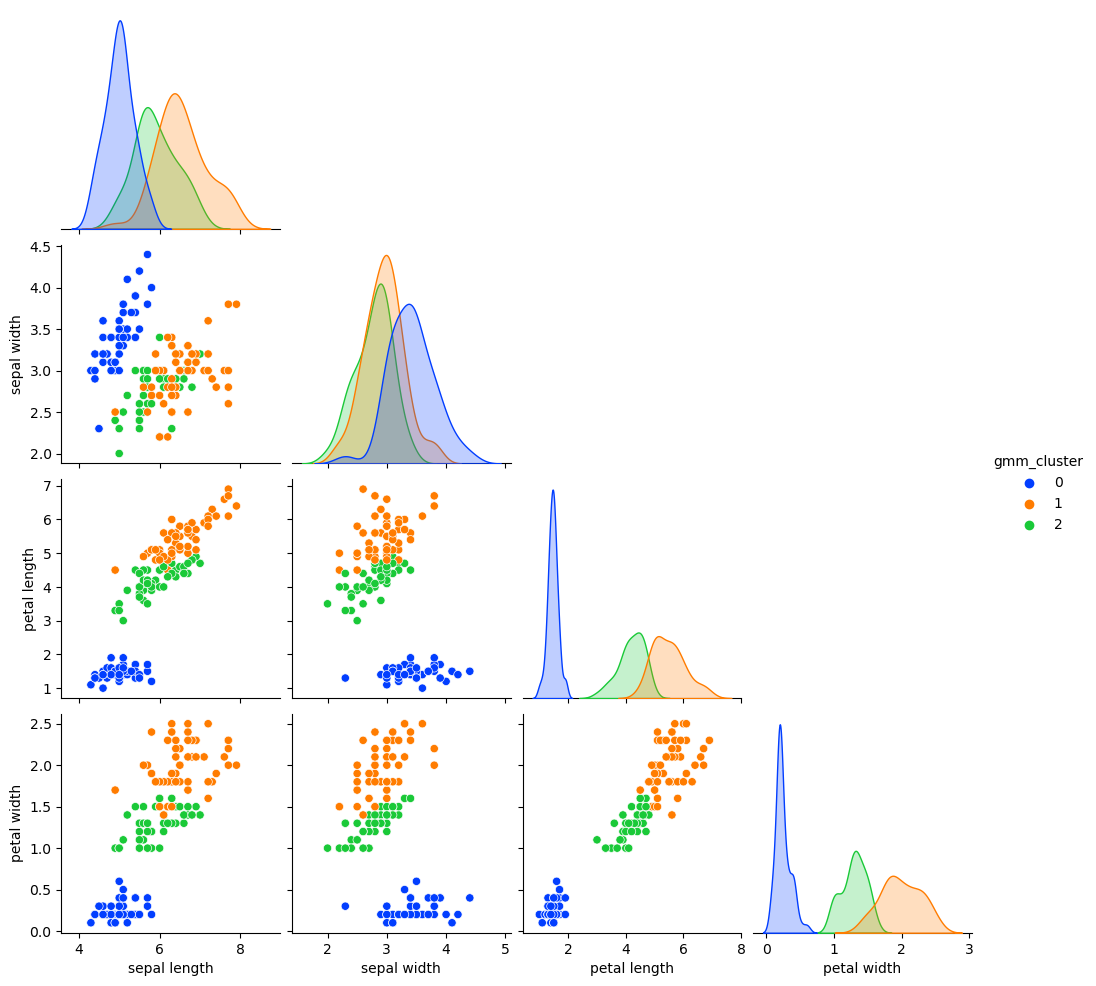

In [21]:
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,
            diag_kind='kde',
            hue='gmm_cluster',
            corner=True,
            palette='bright')
plt.show()

In [ ]:
# k-means는 원형, GMM은 타원형태의 데이터를 잘 군집화하는 것으로 확인
# 꽃의 종류는 sepal length, sepal width 변수보다 petal width와 petal length로 잘 구별

In [2]:
###########################################################################################
# 연관분석

# Run-test : 연속적인 binary값(0, 1)이 임의적이 아닌지 (연관이 있는지) 검정하는 검정기법
#            데이터가 시간순으로 ‘무작위’인지 확인하기 위해 연속된 동일 특성의 Run 개수를 계산해 검정하는 비모수 통계 방법
# 귀무가설 : 연속적인 관측값이 임의적이다.
# 대립가설 :          ...            이 아니다.(즉, 연관성이 있다)
'''
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다.
bbbbbbaaaaabbaaaabbb
두 상품의 구매패턴이 연관성이 있는지 검정하라
'''
import pandas as pd
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b',]
test_df = pd.DataFrame(data, columns=['product'])
test_df

,product
0,a
1,a
2,b
3,b
4,a
5,a
6,a
7,a
8,b
9,b


In [5]:
from statsmodels.sandbox.stats.runs import runstest_1samp

# Run-test를 위한 데이터 변환
test_df.loc[test_df['product']=='a','product'] = 1
test_df.loc[test_df['product']=='b','product'] = 0
test_df

,product
0,1
1,1
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [6]:
runstest_1samp(test_df['product'], cutoff=0.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

In [ ]:
# 유의수준 0.05 gkdptj p-value값이 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉, 상품 a와 b는 구매에 연관이 없다.

In [8]:
#!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [9]:
#######################################################################
# 연관규칙분석 실습
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [10]:
df = pd.DataFrame(te_ary, columns = te.columns_)
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [12]:
# 지지도가 60% 이상인 품목만 추출
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)


In [17]:
# 규칙의 길이를 추출하는 방법
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Beer, Apple)",2
5,0.375,"(Beer, Milk)",2
6,0.500,"(Beer, Rice)",2


In [23]:
# groceries 데이터세트로 연관규칙분석 시행
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/groceries.csv')
df

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [26]:
# 콤마로 구매목록이 구분되어 있기 때문에 해당 문자열을 콤마값으로부터 구분
df_split = df.iloc[:, 0].str.split(',', expand=True)
df_split.values

array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [28]:
# value값에 None이 있으므로 None을 지우고 트랜잭션 형태로 바꿔줄 수 있게 데이터를 변환
df_split_ary = df_split.values
groceries=[]
for i in range(len(df_split_ary)):
    temp = list(filter(None, df_split_ary[i]))
    groceries.append(temp)
groceries

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['tropical fruit',
  'cream cheese',

In [29]:
# 트랜잭션 형태의 데이터프레임으로 만들자
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
groceries_tr = te.fit(groceries).transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns=te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# 지지도가 5% 이상인 빈번항목집합을 탐색
from mlxtend.frequent_patterns import apriori

groceries_ap =  apriori(groceries_tr, min_support=0.01, use_colnames=True)
groceries_ap

,support,itemsets
0,0.033455,(UHT-milk)
1,0.017694,(baking powder)
2,0.052471,(beef)
3,0.033252,(berries)
4,0.026032,(beverages)
...,...,...
328,0.011999,"(root vegetables, tropical fruit, whole milk)"
329,0.014541,"(root vegetables, whole milk, yogurt)"
330,0.010474,"(yogurt, whole milk, soda)"
331,0.015152,"(tropical fruit, whole milk, yogurt)"


In [31]:
# association_rules 함수를 사용하면 한눈에 만은 규칙을 파악할 수 있다.
from mlxtend.frequent_patterns import association_rules
# 신뢰도가 0.3 이상인 빈번항목집합 탐색
association_rules(groceries_ap, metric='confidence', min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(other vegetables),0.052471,0.193512,0.019727,0.375969,1.942869,1.0,0.009574,1.292384,0.512171,0.087191,0.226236,0.238957
1,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,1.0,0.011669,1.332612,0.708220,0.120677,0.249594,0.245455
2,(beef),(whole milk),0.052471,0.255542,0.021253,0.405039,1.585018,1.0,0.007844,1.251271,0.389532,0.074113,0.200813,0.244103
3,(berries),(other vegetables),0.033252,0.193512,0.010270,0.308869,1.596118,1.0,0.003836,1.166909,0.386326,0.047440,0.143035,0.180971
4,(berries),(whole milk),0.033252,0.255542,0.011796,0.354740,1.388187,1.0,0.003299,1.153733,0.289254,0.042584,0.133249,0.200450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"(soda, yogurt)",(whole milk),0.027354,0.255542,0.010474,0.382900,1.498382,1.0,0.003484,1.206381,0.341968,0.038447,0.171074,0.211943
121,"(whole milk, tropical fruit)",(yogurt),0.042302,0.139516,0.015152,0.358173,2.567255,1.0,0.009250,1.340679,0.637444,0.090909,0.254109,0.233387
122,"(tropical fruit, yogurt)",(whole milk),0.029286,0.255542,0.015152,0.517361,2.024564,1.0,0.007668,1.542474,0.521334,0.056184,0.351691,0.288326
123,"(whipped/sour cream, whole milk)",(yogurt),0.032235,0.139516,0.010881,0.337539,2.419361,1.0,0.006383,1.298921,0.606209,0.067636,0.230130,0.207764


In [33]:
# 하나의 규칙만 가지고 검색하는 것이 아니라 규칙의 길이가 2 이상, 신뢰도가 0.4 이상, 향상도가 3 이상인 규칙만 추출해보자.
rules = association_rules(groceries_ap, metric="lift", min_threshold=1)
# 규칙의 길이 컬럼 생성 
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >=2) &
       (rules['confidence'] >=0.4) &
       (rules['lift'] >=3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len
418,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,1.0,0.006948,1.949012,0.681957,0.051646,0.486920,0.319903,2
490,"(root vegetables, tropical fruit)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,1.0,0.008231,1.941197,0.683334,0.060835,0.484854,0.324062,2


In [34]:
#######################################################################################################
# 시계열 분석 : 추세와 계절성이 별개로 존재한다면 Additive 모형을 선택하고 추세와 계절성이 있다면 Multiplicative 모형을 선택
import pandas as pd
import warnings

data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/arima_data.csv', names = ['day', 'price'])
data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [38]:
# 원본데이터를 확인했을 때 day의 타입이 object 문자열이므로 시계열분석을 위해서는 datetime 타입으로 변환
data['day'] = pd.to_datetime(data['day'], format='%Y-%m-%d')
data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [39]:
data.set_index('day', inplace=True)
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


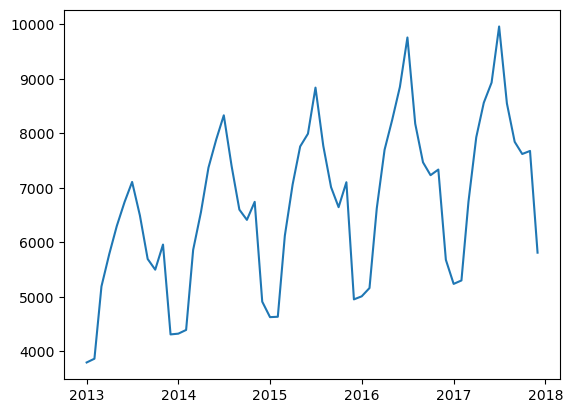

In [40]:
import matplotlib.pyplot as plt
plt.plot(data.index, data['price'])

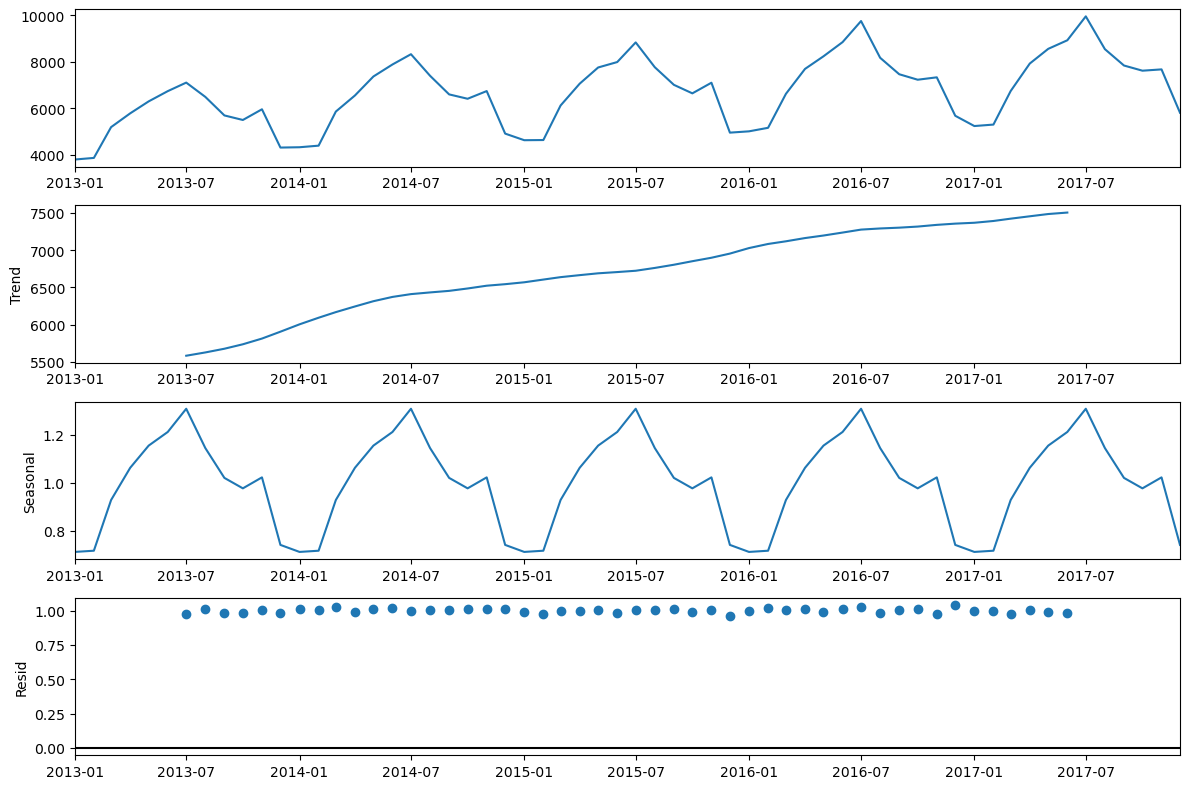

In [42]:
# 추세에 따라 계절성이 있다. -> Multiplicative를 적용하여 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

In [43]:
# trend와 seasonal이 명확히 존재하며 불구칙 요인은 거의 없음을 확인
from statsmodels.tsa.stattools import adfuller

training = data[:'2016-12-01']
test = data.drop(training.index)

adf = adfuller(training, regression='ct')
print('ADF Statics: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statics: -1.9997199341328131
p-value : 0.6015863303793997


<AxesSubplot: xlabel='day'>

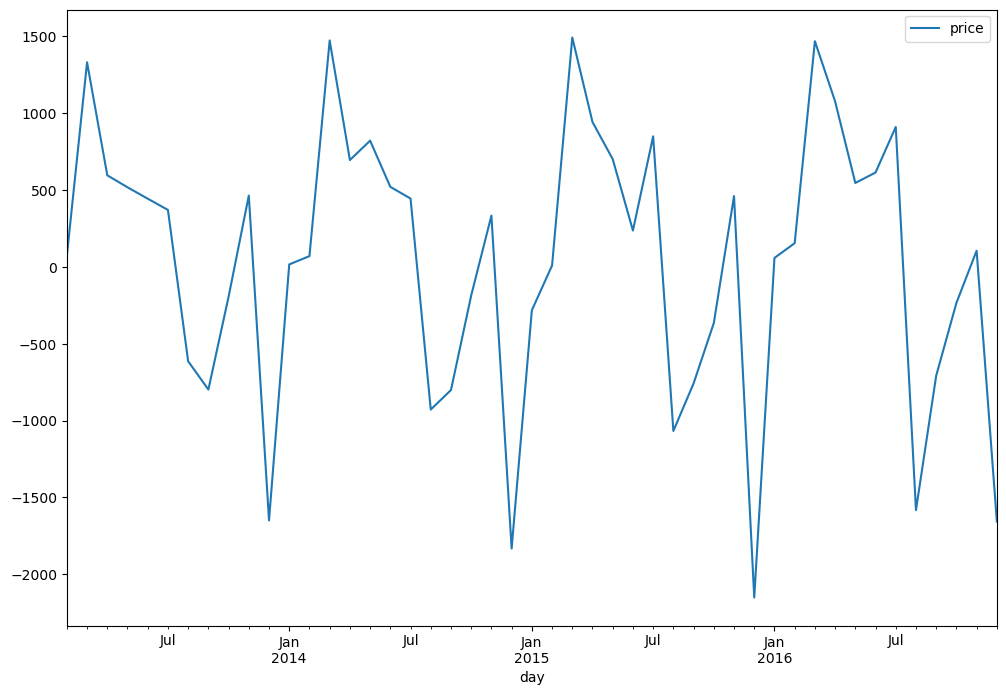

In [44]:
# p-value가 0.05보다 크므로 해당 데이터는 정상성을 가지지 않는다.

# 비정상시계열을 정상시계열로 변환시키기 위해서는 1차 차분 혹은 로그 변환

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
diff_data =  training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

In [45]:
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -12.094547576926411
p-value : 2.0851606399612174e-22


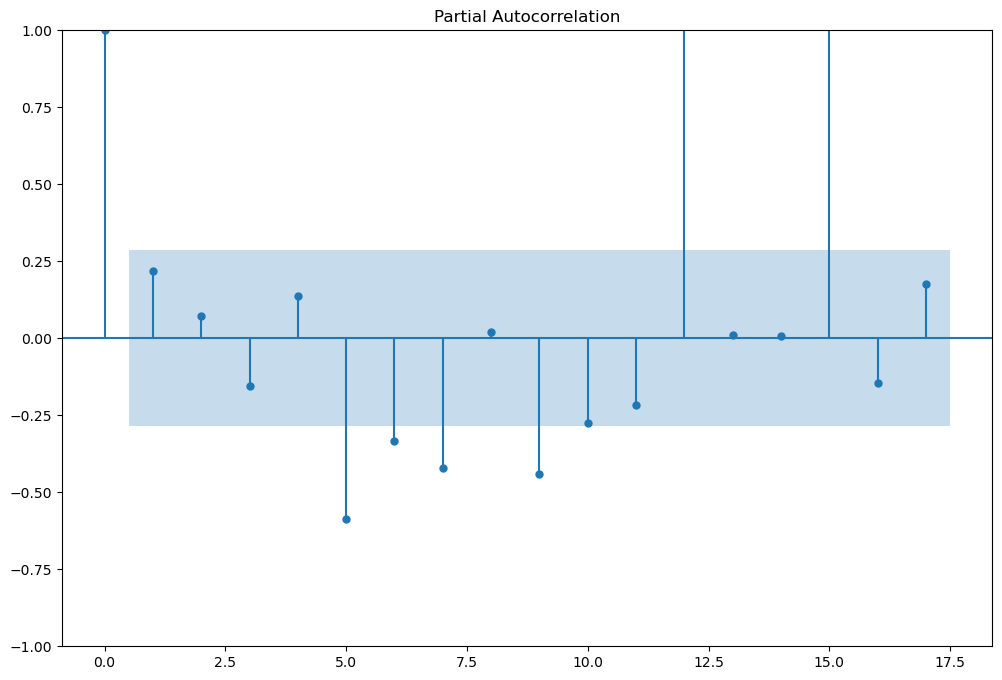

In [48]:
# p-value가 0.05보다 작으므로 귀무가설을 기각

plot_pacf(diff_data)
plt.show()

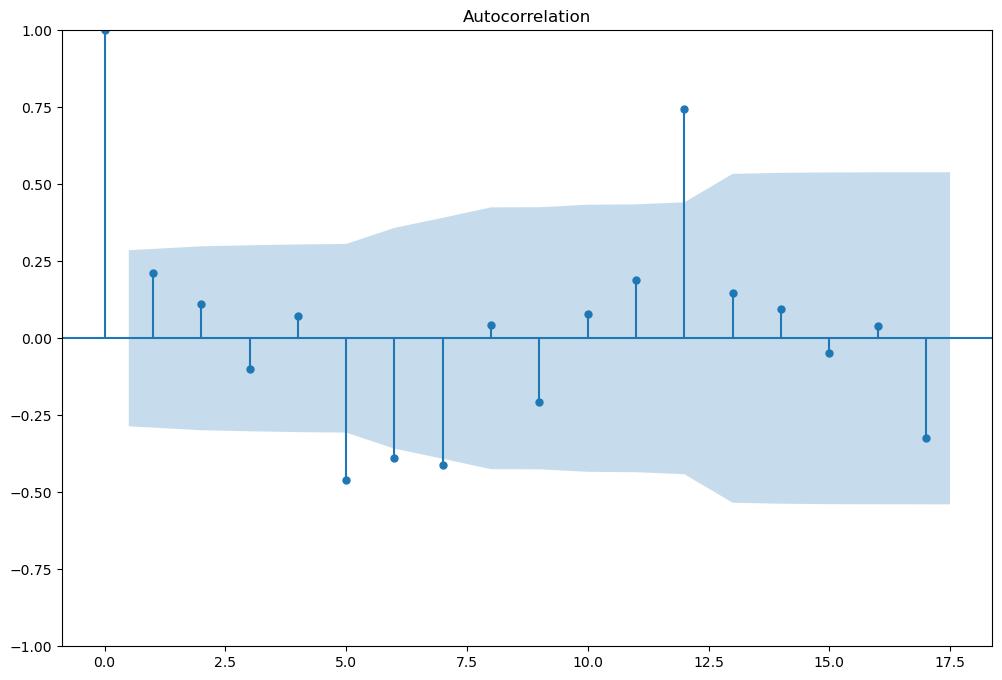

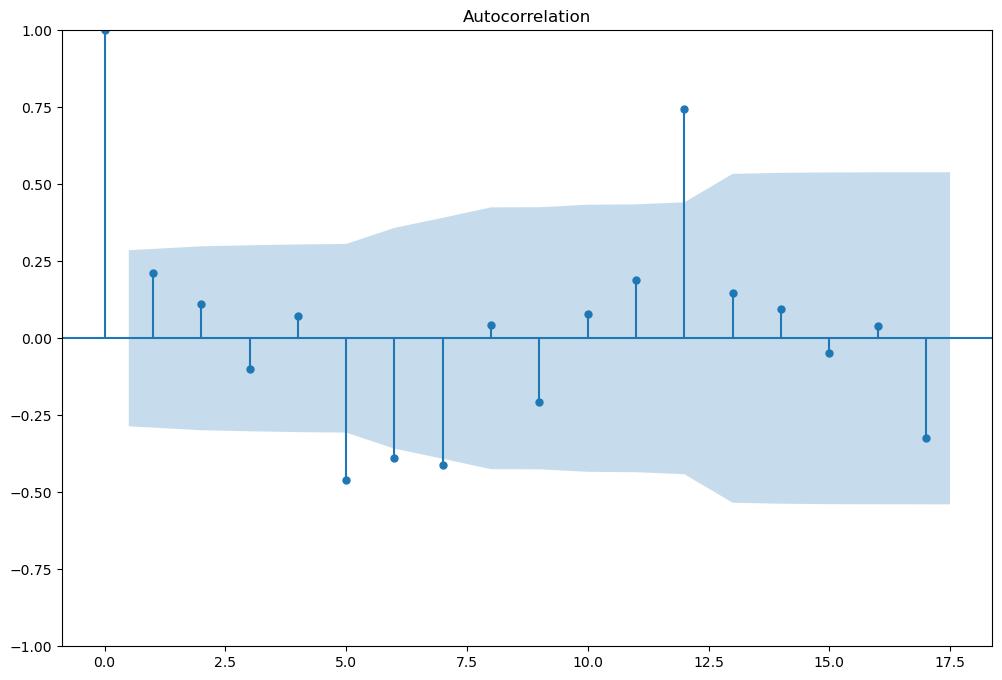

In [49]:
# 자기상관함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data)

In [50]:
# ARIMA 모델
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training, order=(2, 1, 2))
res = model.fit()
res.summary()

C:\Users\kakaopaysec\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kakaopaysec\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: No

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sat, 06 Dec 2025   AIC                            761.750
Time:                        14:51:44   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.232
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3164      0.190     -6.917      0.000      -1.689      -0.943
ar.L2         -0.3188      0.191     -1.668      0.095      -0.693       0.056
ma.L1          1.9700      0.244      8.086      0.000       1.493       2.448
ma.L2          0.9949      0.242      4.108      0.000       0.520       1.470
sigma2      4.466e+05   1.14e-06   3.93e+11      0.000    4.47e+05    4.47e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.93e+26. Standard errors may be unstable.
"""

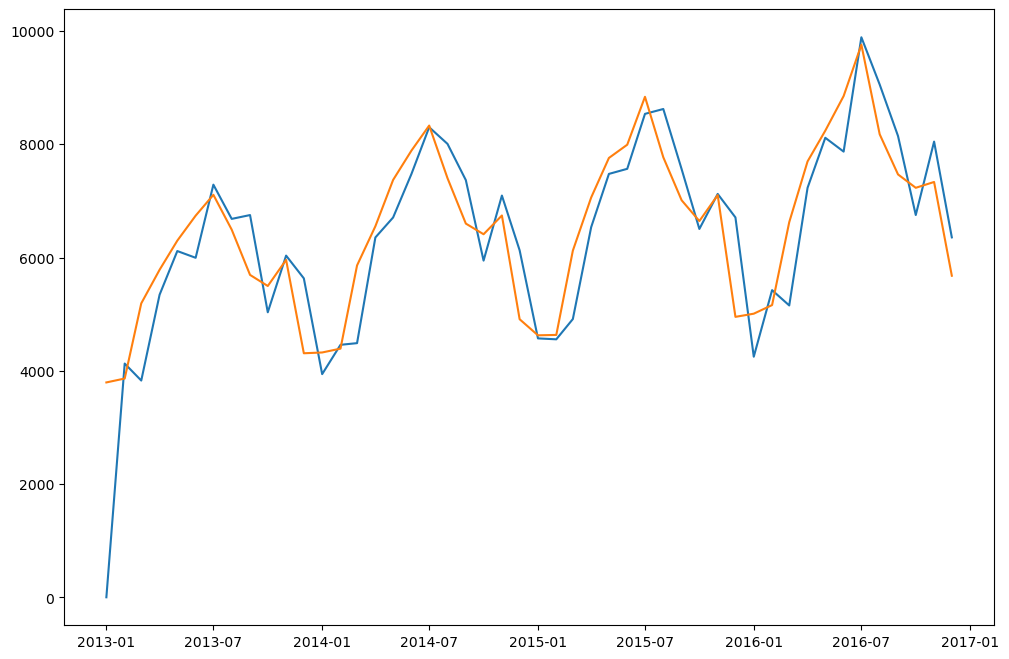

In [51]:
plt.plot(res.predict())
plt.plot(training)

In [52]:
forecast_data = res.forecast(steps=len(test), alpha=.05)

pred_y = forecast_data
pred_y


2017-01-01    5829.671988
2017-02-01    5507.442943
2017-03-01    5883.280891
2017-04-01    5491.243604
2017-05-01    5887.515848
2017-06-01    5490.832871
2017-07-01    5886.706464
2017-08-01    5492.029303
2017-09-01    5885.389479
2017-10-01    5493.381599
2017-11-01    5884.029132
2017-12-01    5494.741287
Freq: MS, Name: predicted_mean, dtype: float64

In [53]:
test_y = test
test_y

,price
day,
2017-01-01,5236
2017-02-01,5299
2017-03-01,6744
2017-04-01,7927
2017-05-01,8561
2017-06-01,8930
2017-07-01,9960
2017-08-01,8548
2017-09-01,7843


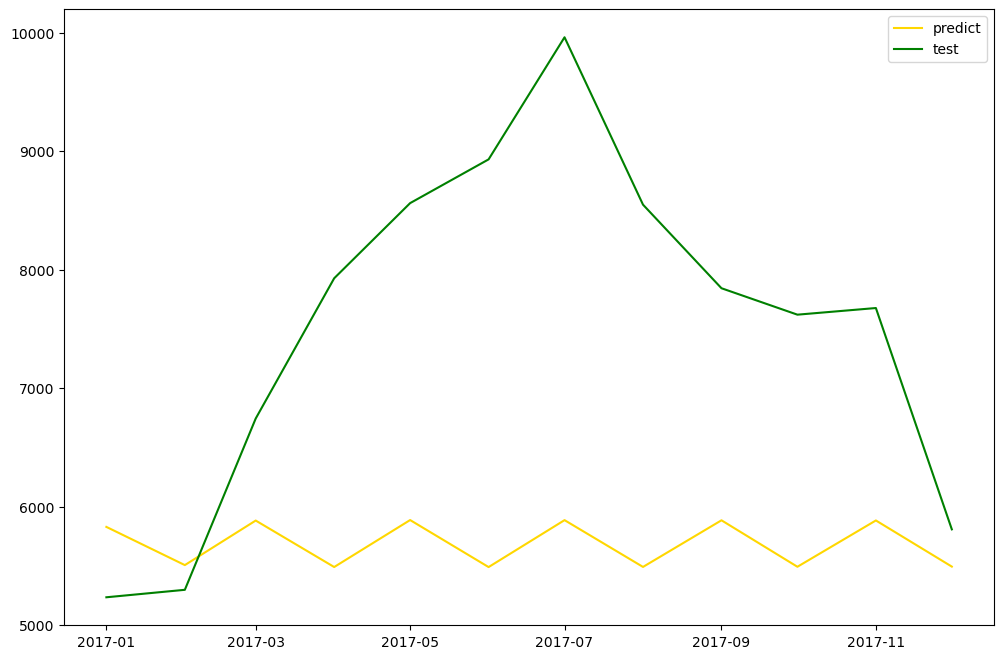

In [54]:
plt.plot(pred_y, color='gold', label='predict') # 모델이 예상한 가격그래프
plt.plot(test_y, color='green', label='test')  # 실제 가격 그래프
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
print("r2_score : ", r2_score(test_y, pred_y))
RMSE = mean_squared_error(test_y, pred_y)**0.5
print("RMSE : ", RMSE)

r2_score :  -1.6445151820553434
RMSE :  2302.903413572533


In [56]:
pip install pmdarima

     -------------------------------------- 615.5/615.5 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [58]:
from pmdarima import auto_arima

auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                       max_p=3, max_q=3,
                       start_P=0, start_Q=0,
                       max_P=3, max_Q=3, m=12,
                       seasonal=True, information_criterion='aic',
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [59]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sat, 06 Dec 2025   AIC                            480.687
Time:                                     14:58:57   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
auto_pred_y = pd.DataFrame(auto_model.predict(n_periods=len(test)),
                          index=test.index)
auto_pred_y.columns = ['predicted_price']
auto_pred_y

,predicted_price
day,
2017-01-01,5609.436976
2017-02-01,5761.436976
2017-03-01,7225.436976
2017-04-01,8298.436976
2017-05-01,8841.436976
2017-06-01,9452.436976
2017-07-01,10359.436976
2017-08-01,8777.436976
2017-09-01,8068.436976


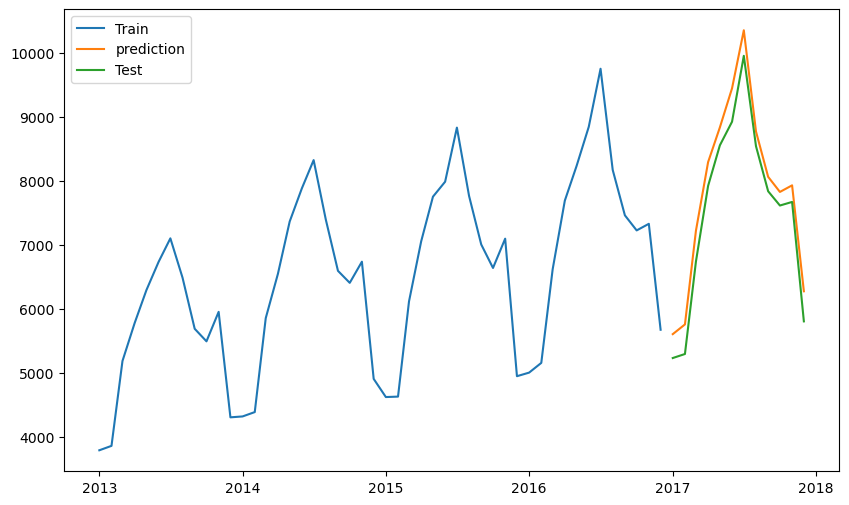

In [63]:
# test데이터와 차이가 있는지 시각화
plt.figure(figsize=(10,6))
plt.plot(training, label='Train')
plt.plot(auto_pred_y, label='prediction')
plt.plot(test, label='Test')
plt.legend(loc='upper left')
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
print("r2_score : ", r2_score(test_y, auto_pred_y))
RMSE = mean_squared_error(test_y, auto_pred_y)**0.5
print("RMSE : ", RMSE)

r2_score :  0.9305467069431359
RMSE :  373.2064254331493
